<a href="https://colab.research.google.com/github/Piquant92/Django-Project/blob/master/250318_SafetyHelmet_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
import shutil
import os

# 'runs' 폴더 경로
folder_path = 'Hard_Data'

# 폴더가 존재하면 삭제
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"'{folder_path}' 폴더가 삭제되었습니다.")
else:
    print(f"'{folder_path}' 폴더가 존재하지 않습니다.")
'''

'Hard_Data' 폴더가 삭제되었습니다.


In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
import zipfile
with zipfile.ZipFile('/content/Hard_Hat.zip','r') as zip_ref:
    zip_ref.extractall('/content/Hard_Data/')

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
! yolo task=detect mode=predict model=yolov8n.pt

# Yolov8n (6M) < Yolov8s (21M) < Yolov8m (50M) < Yolov8l (84M) < Yolov8x (130M)

100% 6.25M/6.25M [00:00<00:00, 278MB/s]
WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 42.8ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 42.6ms
Speed: 9.7ms preprocess, 42.7ms inference, 209.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
#model.to('cuda')
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
# imgsz=640 는 파일의 크기가 일정하지 않기때문에 파일의 크기를 640으로
# 모든 파일을 변경하여 훈련을 시키겠다는 의미이다.
result = model.train(data='/content/Hard_Data/data.yaml', epochs=10, imgsz=640)

Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Hard_Data/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 27.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 122MB/s]


AMP: checks passed ✅


train: Scanning /content/Hard_Data/train/labels... 4916 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4916/4916 [00:05<00:00, 886.15it/s]


train: New cache created: /content/Hard_Data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Hard_Data/valid/labels... 1413 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1413/1413 [00:02<00:00, 548.66it/s]


val: New cache created: /content/Hard_Data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.11G      1.363      1.323      1.135         15        640: 100%|██████████| 308/308 [01:33<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.41it/s]


                   all       1413       5252      0.921      0.867      0.936      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.96G      1.314     0.8384       1.12         20        640: 100%|██████████| 308/308 [01:27<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.09it/s]

                   all       1413       5252      0.919      0.889      0.948      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.98G      1.301     0.7531      1.119         25        640: 100%|██████████| 308/308 [01:24<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.11it/s]

                   all       1413       5252      0.931      0.873      0.945       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         3G       1.26     0.7003      1.106         21        640: 100%|██████████| 308/308 [01:25<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.34it/s]

                   all       1413       5252      0.929      0.898      0.953      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.02G      1.236     0.6561      1.095         11        640: 100%|██████████| 308/308 [01:24<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.15it/s]

                   all       1413       5252      0.945      0.892      0.959      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.03G      1.216     0.6197      1.084          9        640: 100%|██████████| 308/308 [01:23<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.24it/s]

                   all       1413       5252      0.944      0.908      0.962      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.05G      1.197     0.5892      1.079         13        640: 100%|██████████| 308/308 [01:23<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.19it/s]

                   all       1413       5252      0.943       0.92      0.969       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.07G       1.17     0.5571      1.062         13        640: 100%|██████████| 308/308 [01:25<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.40it/s]

                   all       1413       5252      0.957      0.915      0.971      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.08G      1.147     0.5308       1.05         14        640: 100%|██████████| 308/308 [01:24<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:11<00:00,  4.06it/s]

                   all       1413       5252      0.945      0.935      0.974      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       3.1G      1.131     0.5092      1.042         15        640: 100%|██████████| 308/308 [01:24<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:10<00:00,  4.11it/s]

                   all       1413       5252      0.955      0.933      0.976      0.676



10 epochs completed in 0.272 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:13<00:00,  3.34it/s]


                   all       1413       5252      0.955      0.934      0.976      0.676
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(model.names)
model.save()

{0: '0', 1: 'licence'}


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img='01-0543_jpg.rf.1d7f12363753ac7b0acb93e0971aa6da.jpg'  # 해상도 416 X 416
img = cv2.imread(img)
result = model.predict(source=img)
# print(img)


0: 640x640 4 0s, 34.3ms
Speed: 9.2ms preprocess, 34.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
for box in result[0].boxes:


        # 좌표 추출 및 텐서를 CPU로 이동 후 numpy() 호출
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().flatten().astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 여기에서 img는 numpy.ndarray이어야 함

        # 클래스 이름과 신뢰도 추출
        class_index = int(box.cls)
        class_name = model.names[class_index]  # 클래스 이름 가져오기
        confidence = float(box.conf)
        font = cv2.FONT_HERSHEY_SIMPLEX


        # 출력
        print("==>", class_index, class_name, confidence)
        # 텍스트 출력
        cv2.putText(img, f'{class_name} {confidence:.2f}', (x1, y1 - 10), font, 0.5, (0, 255, 0), 2)

# OpenCV는 기본적으로 BGR 형식이므로 RGB로 변환해서 표시


==> 0 0 0.9907874464988708
==> 0 0 0.9884794354438782
==> 0 0 0.9878365397453308


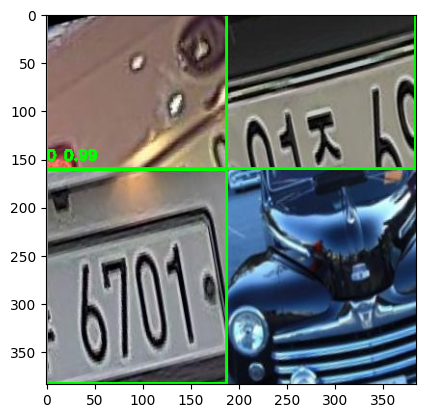

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()